## Arrhythmia

In [1]:
import pandas as pd

# loading the data

In [2]:
traindata =pd.read_csv("mitbih_train.csv",header=None)

In [41]:
traindata.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

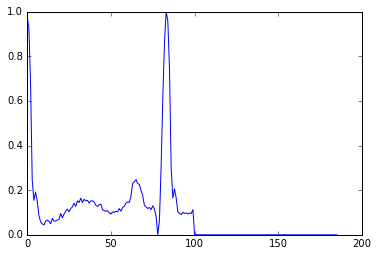

In [43]:
plt.plot(traindata.iloc[0,0:186])

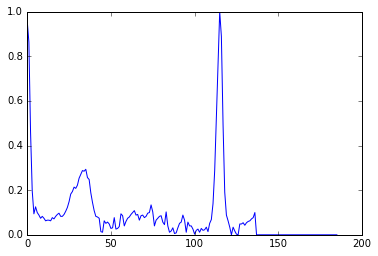

In [44]:
plt.plot(traindata.iloc[1,0:186])

In [45]:
traindata.shape

(87554, 188)

In [46]:
testdata =pd.read_csv("mitbih_test.csv",header=None)

In [47]:
testdata.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
testdata.shape

(21892, 188)

# spliting the data

In [49]:
x_train=traindata.iloc[:,0:186]
y_train=traindata.iloc[:,187]
#print(y_train)
x_test=testdata.iloc[:,0:186]
y_test=testdata.iloc[:,-1]

# normalizing the data

In [50]:
from sklearn.preprocessing import Normalizer 

In [51]:
x_train=Normalizer().fit(x_train).transform(x_train)
x_test=Normalizer().fit(x_test).transform(x_test)

# one hot reperesentation

In [52]:
import keras
from keras.utils import to_categorical
import numpy as np

In [53]:
y_train1=np.array(y_train)
#print(y_train1)
y_test1=np.array(y_test)
y_train=to_categorical(y_train1)
y_testcat=to_categorical(y_test1)

In [54]:
print(y_train.shape)
print(y_test.shape)


(87554, 5)
(21892,)


In [55]:

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

(87554, 186)
(87554, 186, 1)


# model creation

In [18]:
from keras.models import Sequential
from keras.layers import Convolution1D,MaxPooling1D,Flatten,Dense,Dropout
import warnings
warnings.filterwarnings('ignore')

In [56]:
model=Sequential()
model.add(Convolution1D(64,3,border_mode='same',activation="relu",input_shape=(186,1)))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 186, 64)           256       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 93, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5952)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               761984    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 645       
Total params: 762,885
Trainable params: 762,885
Non-trainable params: 0
_________________________________________________________________


## compliling the model

In [20]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])


## saving the checkpoint and model weights

In [57]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger

In [22]:
checkpoint=ModelCheckpoint(filepath="results/checkpoint-{epoch:02d}.hdf5",verbose=1,save_best_only=True,monitor='loss')
csv_logger=CSVLogger('results/logger.csv',separator=',',append=False)

In [23]:
model.fit(x_train,y_train,nb_epoch=2,callbacks=[checkpoint,csv_logger])
model.save("results/model1.hdf5")

Epoch 1/2
87554/87554 [==============================] - 59s 679us/step - loss: 0.1104 - acc: 0.9654

Epoch 00001: loss improved from inf to 0.11037, saving model to results/checkpoint-01.hdf5
Epoch 2/2
87554/87554 [==============================] - 60s 682us/step - loss: 0.0729 - acc: 0.9790

Epoch 00002: loss improved from 0.11037 to 0.07286, saving model to results/checkpoint-02.hdf5


# load the weights

In [24]:
from keras.models import load_model

In [25]:
loadedmodel = load_model('results/model1.hdf5')
loadedmodel.load_weights('results/checkpoint-01.hdf5')

# predicting the classes

In [26]:
y_pred=loadedmodel.predict_classes(x_test)
print(y_pred)

[0 0 0 ... 0 4 4]


In [58]:
np.savetxt('results/expectedlabel.txt',y_test,fmt='%01d')
np.savetxt('results/predictinglabel.txt',y_pred,fmt='%01d')

In [28]:
loadedmodel.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [29]:
loss,accuracy=loadedmodel.evaluate(x_test,y_testcat)

21892/21892 [==============================] - 3s 148us/step


In [30]:
print("Loss : %.2f, Accuracy : %.2f%%"%(loss,accuracy*100))

Loss : 0.07, Accuracy : 97.90%


In [31]:
from sklearn.metrics import confusion_matrix,precision_score,classification_report,recall_score, f1_score


In [32]:
y_pred

array([0, 0, 0, ..., 0, 4, 4], dtype=int64)

In [33]:
y_test1


array([0., 0., 0., ..., 4., 4., 4.])

In [34]:
confusion_matrix(y_test1,y_pred)
matrix=confusion_matrix(y_test1,y_pred)
matrix=pd.DataFrame(matrix)
matrix

array([[18028,    18,    58,     0,    14],
       [  312,   229,    14,     0,     1],
       [  409,     1,  1010,     7,    21],
       [  139,     0,    11,    11,     1],
       [  168,     0,     5,     0,  1435]])

In [35]:
precision_score(y_test1,y_pred,average=None)

array([0.94605374, 0.9233871 , 0.91985428, 0.61111111, 0.97486413])

In [36]:
recall_score(y_test1,y_pred,average=None)

array([0.99503256, 0.4118705 , 0.69751381, 0.06790123, 0.89241294])

In [37]:
f1_score(y_test1,y_pred,average=None)

array([0.96992522, 0.56965174, 0.79340141, 0.12222222, 0.93181818])

In [38]:
print(classification_report(y_test1,y_pred))

             precision    recall  f1-score   support

        0.0       0.95      1.00      0.97     18118
        1.0       0.92      0.41      0.57       556
        2.0       0.92      0.70      0.79      1448
        3.0       0.61      0.07      0.12       162
        4.0       0.97      0.89      0.93      1608

avg / total       0.94      0.95      0.94     21892

